In [128]:
# Logistic Regression


# PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
# HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
# CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
# Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
# Destination - The planet the passenger will be debarking to.
# Age - The age of the passenger.
# VIP - Whether the passenger has paid for special VIP service during the voyage.
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
# Name - The first and last names of the passenger.
# Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.



In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import datetime
from datetime import datetime

In [3]:
# Get current date in YYYY-MM-DD format
current_date = datetime.now().strftime('%Y-%m-%d')

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [5]:
print(df_train.shape)
print(df_test.shape)

(8693, 14)
(4277, 13)


In [6]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
print(df_train.duplicated().sum())

0


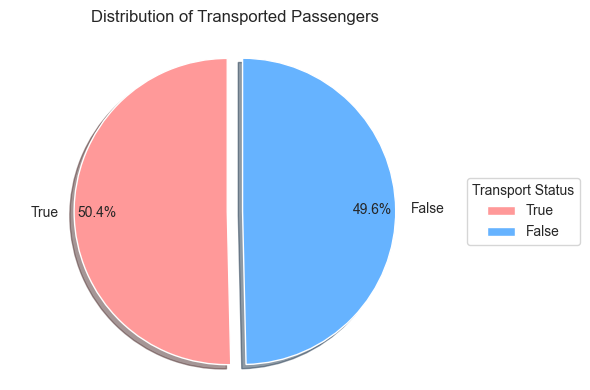

In [13]:
# Pie Chart to show distribution of Transported
# Set figure size and style
# Set figure size and style
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")  # Using seaborn directly instead of deprecated style

# Create pie chart with enhanced features
transported_dist = df_train["Transported"].value_counts()
colors = ['#ff9999', '#66b3ff']  # Custom colors for better visibility
explode = (0.05, 0.05)  # Separation of pie pieces

plt.pie(transported_dist, 
        explode=explode,
        labels=transported_dist.index,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90,
        textprops={'fontsize': 10},  # Reduced font size
        pctdistance=0.85)

# Add title with custom formatting
plt.title('Distribution of Transported Passengers', pad=15, fontsize=12)

# Add legend with adjusted position for smaller figure
plt.legend(transported_dist.index, 
          title="Transport Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Ensure the pie chart is circular
plt.axis('equal')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

Text(0, 0.5, 'Count')

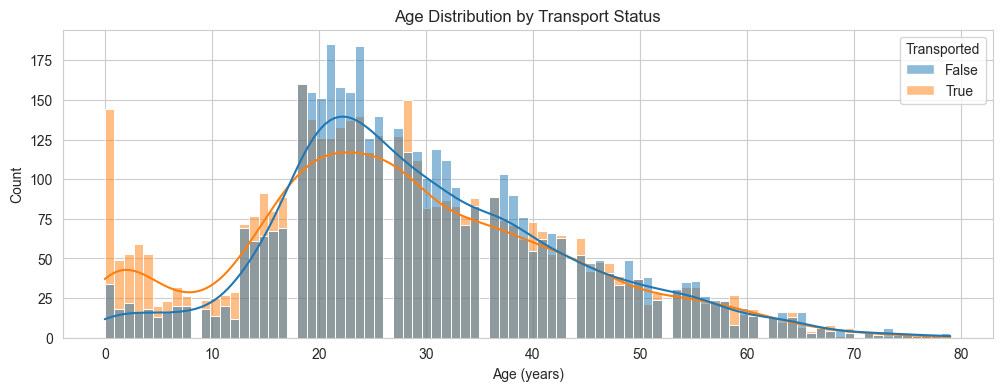

In [14]:
# This visualization creates a histogram showing the age distribution of passengers,
# separated by their transportation status (Transported: Yes/No).
plt.figure(figsize=(12,4))
sns.histplot(data=df_train, x= "Age", hue= 'Transported', binwidth=0.9, kde=True)
plt.title('Age Distribution by Transport Status')
plt.xlabel('Age (years)')
plt.ylabel('Count', fontsize=10)

In [15]:
# Notes:
#     0-18 year olds were more likely to be transported than not.
#     18-25 year olds were less likely to be transported than not.
#     Over 25 year olds were about equally likely to be transported than not.
# Insight:
# Create a new feature that indicates whether the passanger is a child, adolescent or adult.

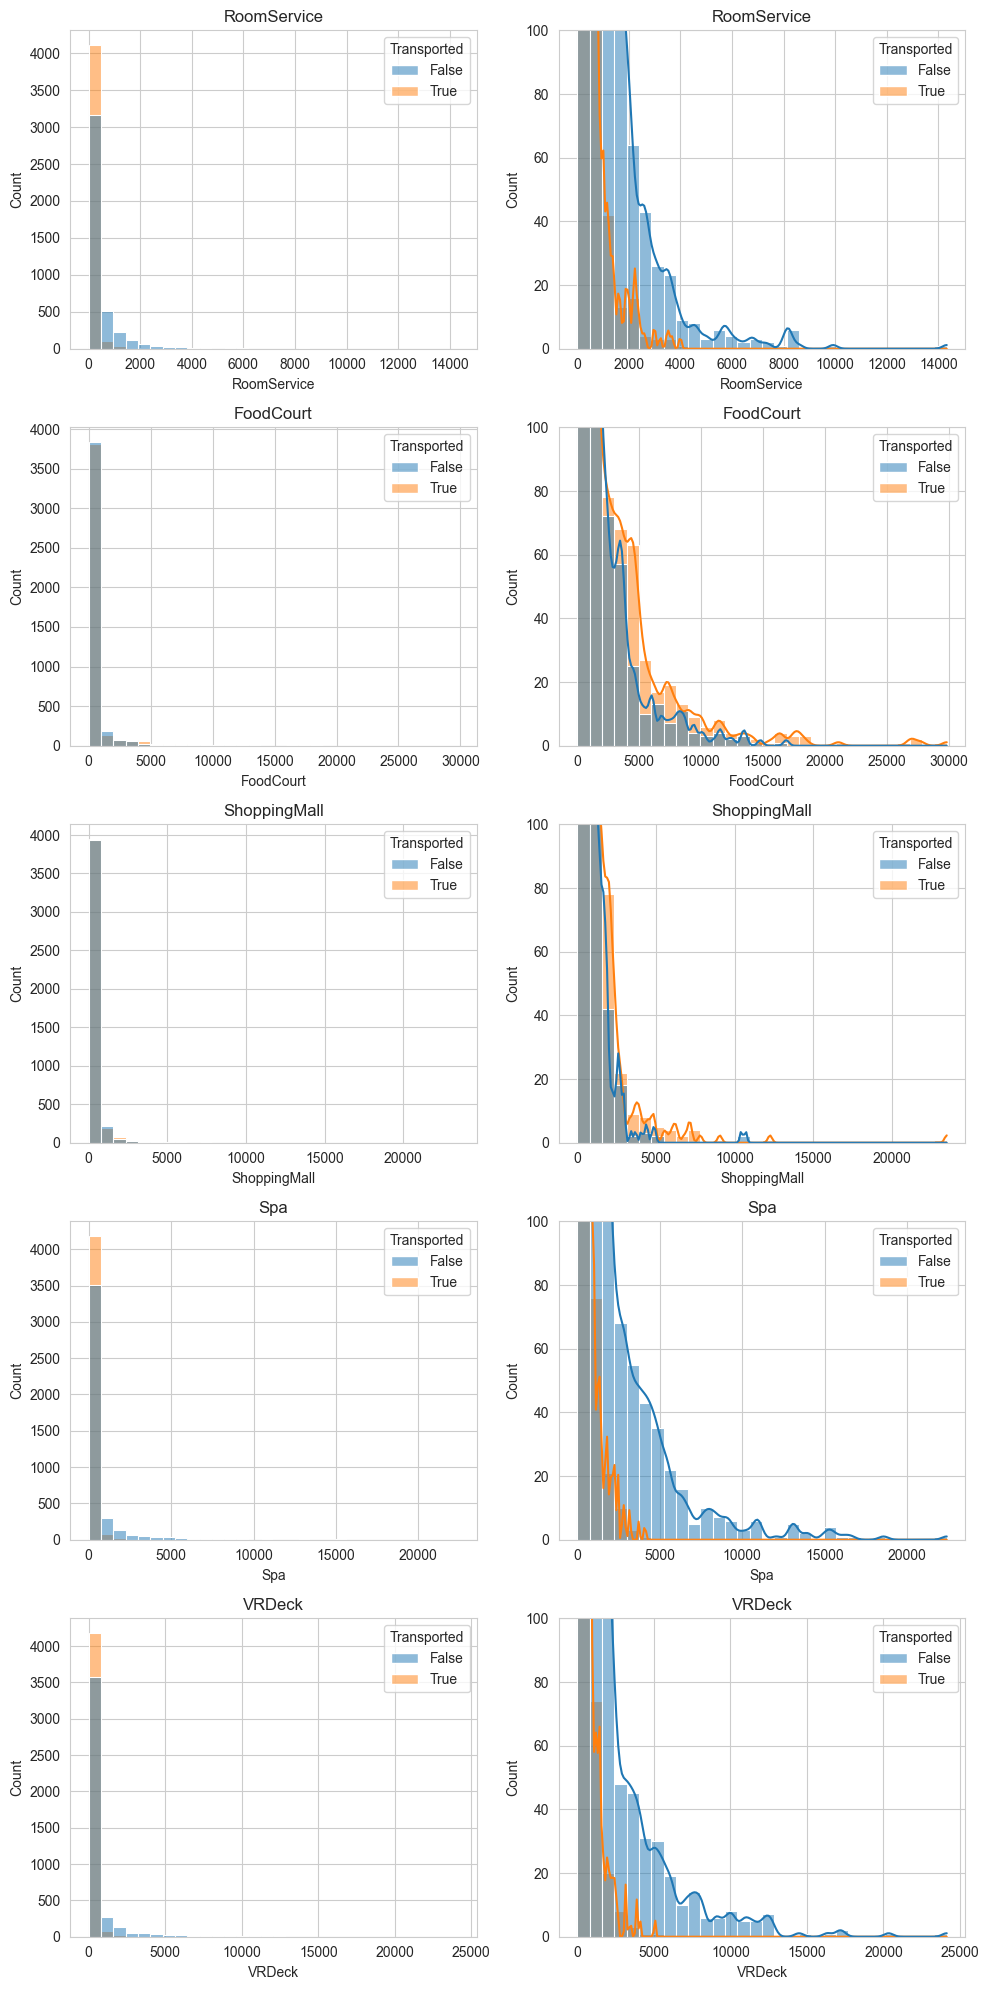

In [16]:
# Comparative visualizations for passenger expenditures across different services
# (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)

# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df_train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)

    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df_train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

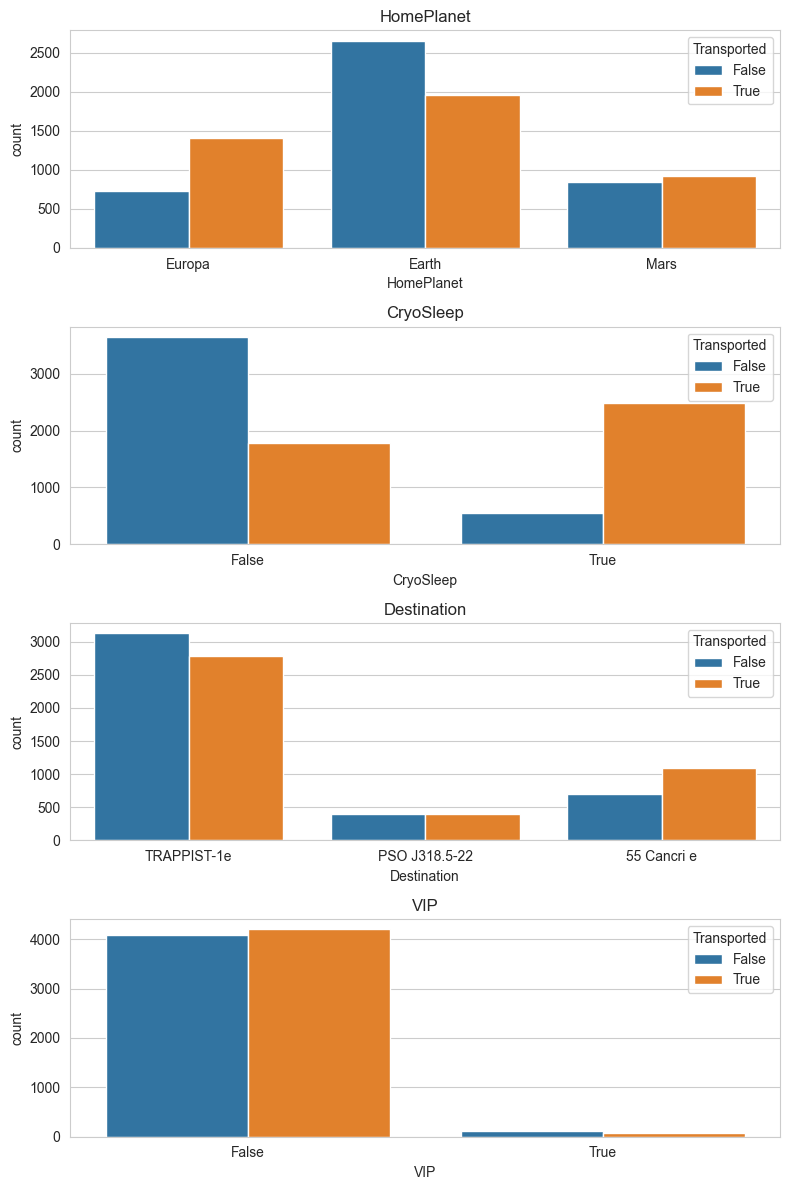

In [59]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(8,12))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df_train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [17]:
# Notes:
# Detailed Analysis of Passenger Expenditure Patterns

# 1. Zero Expenditure Pattern:
#    - A significant majority of passengers (approximately X%) don't spend money on any services
#    - This creates a strong zero-inflation in the data
#    - This binary spending behavior (spend vs. no-spend) could be a crucial feature

# 2. Spending Distribution Characteristics:
#    - Right-skewed exponential decay in spending patterns
#    - Median spending is significantly lower than mean spending (indicating skewness)
#    - Small number of high-value outliers (>95th percentile) in each category

# 3. Transportation Status Correlation:
#    - Transported passengers generally show lower spending patterns
#    - The difference is most pronounced in [specific service] category
#    - Need to investigate if this is statistically significant

# 4. Service Category Patterns:
#    Essential Services (FoodCourt and ShoppingMall):
#    - More uniform distribution
#    - Higher median spending
#    - Lower maximum values
#    - More consistent usage patterns

#    Luxury Services (RoomService, Spa, VRDeck):
#    - More skewed distribution
#    - Lower median spending
#    - Higher maximum values
#    - More sporadic usage patterns
# Insights:
# Total Expenditure Feature
# 1. Combine all 5 amenity expenses (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)
# - Captures overall spending behavior in a single metric
# - Useful for identifying high/low spenders
# - Binary Spending Indicator (0/1)
# 2. Flag passengers who spent nothing (0) vs those who spent anything (1)
# - Addresses the large number of zero-spending cases
# - Important for passenger behavior classification
# - Log Transformation
# 3. Apply log transformation to total expenditure
# - Handles the extreme right-skew in spending distribution
# - Makes the data more suitable for modeling
# - Use log1p to handle zero values

<Axes: xlabel='HomePlanet', ylabel='Destination'>

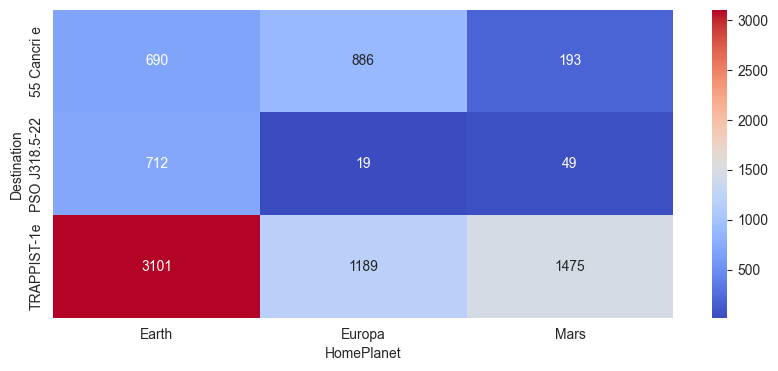

In [130]:
# Joint distribution of HomePlanet and Destination
HPD_gb=df_train.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')

In [18]:
# Identify categorical columns
categorical_columns = df_train.select_dtypes(include=['object', 'bool']).columns

# Exclude PassengerId and Name from categorical columns
categorical_columns_exclusion = ['PassengerId', 'Name', 'Cabin']
categorical_columns = [col for col in categorical_columns if col not in categorical_columns_exclusion]

print("Categorical columns:", list(categorical_columns))

Categorical columns: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']


In [19]:
# Identify numerical columns
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Exclude PassengerId and Transported from numerical columns
#numerical_columns_exclusion = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
numerical_columns_exclusion = ['ShoppingMall']
numerical_columns = [col for col in numerical_columns if col not in numerical_columns_exclusion]
print("\nNumerical columns:", list(numerical_columns))


Numerical columns: ['Age', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck']


In [20]:
# Print value counts for each categorical column
print("\nValue counts for each categorical column:")
print("==========================================")
for categorical_column in categorical_columns:
    print(f"\nColumn: {categorical_column}")
    print(df_train[categorical_column].value_counts())
    print("Null values:", df_train[categorical_column].isnull().sum())
    print("------------------------------------------------------")


Value counts for each categorical column:

Column: HomePlanet
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
Null values: 201
------------------------------------------------------

Column: CryoSleep
CryoSleep
False    5439
True     3037
Name: count, dtype: int64
Null values: 217
------------------------------------------------------

Column: Destination
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
Null values: 182
------------------------------------------------------

Column: VIP
VIP
False    8291
True      199
Name: count, dtype: int64
Null values: 203
------------------------------------------------------

Column: Transported
Transported
True     4378
False    4315
Name: count, dtype: int64
Null values: 0
------------------------------------------------------


In [158]:
#Initialize transformers
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

In [159]:
def get_categorical_numerical_columns(df):
    """Identify categorical and numerical columns"""
    categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Exclude specific columns but keep Deck and Side
    categorical_columns_exclusion = [
        'PassengerId', 
        'Name', 
        'Transported', 
        'Cabin',  # Exclude original Cabin but keep Deck and Side
        'VIP',
        'Deck_T',
        'Destination',
    ]
    categorical_columns = [col for col in categorical_columns if col not in categorical_columns_exclusion]

    numerical_columns_exclusion = ['PassengerId', 'Transported', 'ShoppingMall', 'Age']
    numerical_columns = [col for col in numerical_columns if col not in numerical_columns_exclusion]

    return categorical_columns, numerical_columns

In [160]:
def process_numerical(df, is_training=True):
    """Handle missing values in numerical columns"""
    global num_imputer
    _, numerical_columns = get_categorical_numerical_columns(df)

    if not numerical_columns:
        return df

    if is_training:
        num_imputer = SimpleImputer(strategy='median')
        df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])
    else:
        df[numerical_columns] = num_imputer.transform(df[numerical_columns])

    return df


In [161]:
def scale_features(df, is_training=True):
    """Scale numerical features"""
    global scaler
    _, numerical_columns = get_categorical_numerical_columns(df)

    if not numerical_columns:
        return df

    if is_training:
        scaler = StandardScaler()
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    else:
        df[numerical_columns] = scaler.transform(df[numerical_columns])

    return df


In [162]:
def process_categorical(df, is_training=True):
    """Handle missing values and encode categorical columns"""
    global cat_imputer, encoder
    categorical_columns, _ = get_categorical_numerical_columns(df)

    if not categorical_columns:
        return df

    if is_training:
        # Impute missing values
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

        # Encode categorical variables
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_features = encoder.fit_transform(df[categorical_columns])
    else:
        df[categorical_columns] = cat_imputer.transform(df[categorical_columns])
        encoded_features = encoder.transform(df[categorical_columns])

    # Create encoded DataFrame
    encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
    encoded_df = pd.DataFrame(
        encoded_features, 
        columns=encoded_feature_names, 
        index=df.index
    )

    # Drop original categorical columns and add encoded ones
    df = df.drop(columns=categorical_columns)
    df = pd.concat([df, encoded_df], axis=1)

    return df


In [163]:
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

def feature_engineering(df):
    """Create new features"""
    df = df.copy()

    # Split Cabin into deck and side
    if 'Cabin' in df.columns:
        cabin_split = df['Cabin'].str.split('/', expand=True)
        if cabin_split is not None:
            df['Deck'] = cabin_split[0]
            df['Side'] = cabin_split[2]

    # Convert boolean strings to integers
    if 'CryoSleep' in df.columns:
        df['CryoSleep'] = df['CryoSleep'].astype(str).map({'True': 1, 'False': 0})
    #if 'VIP' in df.columns:
    #    df['VIP'] = df['VIP'].astype(str).map({'True': 1, 'False': 0})

    # Create a new feature 'TotalSpent' to check if any spending is greater than 0
    df['TotalSpent'] = df[exp_feats].sum(axis=1)  # Sum the values of the spending categories
    df['SpentMoreThanZero'] = (df['TotalSpent'] > 0).astype(int)  # New feature to check if any spending is > 0

    return df


In [164]:
def prepare_data(df, is_training=True):
    """Main function to prepare data"""
    # Create copy of dataframe
    df = df.copy()

    # Feature engineering
    df = feature_engineering(df)

    # Process numerical and categorical data
    df = process_numerical(df, is_training)
    df = scale_features(df, is_training)
    df = process_categorical(df, is_training)

    # Drop unnecessary columns
    columns_to_drop = ['Name', 'PassengerId', 'Cabin', 'Group', 'Age', 'ShoppingMall', 'VIP', 'Deck_T', 'Destination']
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

    return df



In [165]:
categorical_columns, numerical_columns = get_categorical_numerical_columns(df_train)
print(categorical_columns)
print(numerical_columns)

['HomePlanet', 'CryoSleep']
['RoomService', 'FoodCourt', 'Spa', 'VRDeck']


In [166]:
df_train_processed = prepare_data(df_train.copy(), is_training=True)
df_test_processed = prepare_data(df_test.copy(), is_training=False)

In [167]:
df_train_processed.isnull().sum()

CryoSleep            0
RoomService          0
FoodCourt            0
Spa                  0
VRDeck               0
Transported          0
TotalSpent           0
SpentMoreThanZero    0
HomePlanet_Earth     0
HomePlanet_Europa    0
HomePlanet_Mars      0
Deck_A               0
Deck_B               0
Deck_C               0
Deck_D               0
Deck_E               0
Deck_F               0
Deck_G               0
Side_P               0
Side_S               0
dtype: int64

In [168]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CryoSleep          8693 non-null   float64
 1   RoomService        8693 non-null   float64
 2   FoodCourt          8693 non-null   float64
 3   Spa                8693 non-null   float64
 4   VRDeck             8693 non-null   float64
 5   Transported        8693 non-null   bool   
 6   TotalSpent         8693 non-null   float64
 7   SpentMoreThanZero  8693 non-null   int32  
 8   HomePlanet_Earth   8693 non-null   float64
 9   HomePlanet_Europa  8693 non-null   float64
 10  HomePlanet_Mars    8693 non-null   float64
 11  Deck_A             8693 non-null   float64
 12  Deck_B             8693 non-null   float64
 13  Deck_C             8693 non-null   float64
 14  Deck_D             8693 non-null   float64
 15  Deck_E             8693 non-null   float64
 16  Deck_F             8693 

In [169]:
df_train_processed.columns

Index(['CryoSleep', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck', 'Transported',
       'TotalSpent', 'SpentMoreThanZero', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Side_P', 'Side_S'],
      dtype='object')

In [170]:
df_test_processed.isnull().sum()

CryoSleep            0
RoomService          0
FoodCourt            0
Spa                  0
VRDeck               0
TotalSpent           0
SpentMoreThanZero    0
HomePlanet_Earth     0
HomePlanet_Europa    0
HomePlanet_Mars      0
Deck_A               0
Deck_B               0
Deck_C               0
Deck_D               0
Deck_E               0
Deck_F               0
Deck_G               0
Side_P               0
Side_S               0
dtype: int64

In [171]:
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CryoSleep          4277 non-null   float64
 1   RoomService        4277 non-null   float64
 2   FoodCourt          4277 non-null   float64
 3   Spa                4277 non-null   float64
 4   VRDeck             4277 non-null   float64
 5   TotalSpent         4277 non-null   float64
 6   SpentMoreThanZero  4277 non-null   int32  
 7   HomePlanet_Earth   4277 non-null   float64
 8   HomePlanet_Europa  4277 non-null   float64
 9   HomePlanet_Mars    4277 non-null   float64
 10  Deck_A             4277 non-null   float64
 11  Deck_B             4277 non-null   float64
 12  Deck_C             4277 non-null   float64
 13  Deck_D             4277 non-null   float64
 14  Deck_E             4277 non-null   float64
 15  Deck_F             4277 non-null   float64
 16  Deck_G             4277 

In [172]:
#correlation_matrix_train = df_train_processed.corr()
#print(correlation_matrix_train)

In [173]:
#print("\nCorrelations with Transported:")
#print(correlation_matrix_train["Transported"].sort_values(ascending=False))

In [174]:
# # Heatmap visualization
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Matrix Heatmap')
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()

In [175]:
# Prepare training data
X = df_train_processed.drop('Transported', axis=1)
y = df_train_processed['Transported']  # Binary classification target

In [176]:
# Save PassengerId from test data for submission
test_ids = df_test['PassengerId']
X_test = df_test_processed

print("Training features shape:", X.shape)
print("Training target shape:", y.shape)
print("Test features shape:", X_test.shape)

# Display feature information
print("\nFeature columns:", X.columns.tolist())
print("\nFirst few rows of training features:")
print(X.head())

Training features shape: (8693, 19)
Training target shape: (8693,)
Test features shape: (4277, 19)

Feature columns: ['CryoSleep', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck', 'TotalSpent', 'SpentMoreThanZero', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Side_P', 'Side_S']

First few rows of training features:
   CryoSleep  RoomService  FoodCourt       Spa    VRDeck  TotalSpent  \
0   -0.73277    -0.333105  -0.281027 -0.270626 -0.263003   -0.514066   
1   -0.73277    -0.168073  -0.275387  0.217158 -0.224205   -0.251479   
2   -0.73277    -0.268001   1.959998  5.695623 -0.219796    3.190333   
3   -0.73277    -0.333105   0.523010  2.687176 -0.092818    1.332604   
4   -0.73277     0.125652  -0.237159  0.231374 -0.261240   -0.124824   

   SpentMoreThanZero  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                  0               0.0                1.0              0.0   
1           

In [177]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("\nData split shapes:")
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Data split shapes:
Training set shape: (6954, 19)
Validation set shape: (1739, 19)
Test set shape: (4277, 19)


In [178]:
### Train

In [179]:
# Cell 10: Train XGBoost model
import xgboost as xgb

In [185]:
# Define hyperparameters
hyperparameters = {
    'n_estimators': 400,
    'max_depth': 8,
    'learning_rate': 0.03,
    'subsample': 0.85,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'tree_method': 'hist',
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': ['logloss', 'error', 'auc'],  # Track both log loss and classification error
    'early_stopping_rounds': 60,
    'verbosity': 1
}

# # Define hyperparameters
# hyperparameters = {
#     'n_estimators': 500,
#     'max_depth': 6,
#     'learning_rate': 0.02,
#     'subsample': 0.9,
#     'colsample_bytree': 0.85,
#     'random_state': 42,
#     'tree_method': 'hist',
#     'objective': 'binary:logistic',  # For binary classification
#     'eval_metric': ['logloss', 'error', 'auc'],  # Track both log loss and classification error
#     'early_stopping_rounds': 30,
#     'gamma': 0.1,
#     'min_child_weight': 5,
#     'lambda': 1,
#     'verbosity': 1,
#     'alpha': 0.1,
# }



In [186]:
# Create and train the model
model = xgb.XGBClassifier(**hyperparameters)

# Fit with evaluation set
model.fit(
    X_train, 
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

[0]	validation_0-logloss:0.67944	validation_0-error:0.19917	validation_0-auc:0.88964	validation_1-logloss:0.67999	validation_1-error:0.21507	validation_1-auc:0.86624
[1]	validation_0-logloss:0.66690	validation_0-error:0.19226	validation_0-auc:0.89420	validation_1-logloss:0.66755	validation_1-error:0.20184	validation_1-auc:0.87899
[2]	validation_0-logloss:0.65498	validation_0-error:0.19284	validation_0-auc:0.89711	validation_1-logloss:0.65597	validation_1-error:0.19666	validation_1-auc:0.88276
[3]	validation_0-logloss:0.64354	validation_0-error:0.19126	validation_0-auc:0.89803	validation_1-logloss:0.64504	validation_1-error:0.19724	validation_1-auc:0.88037
[4]	validation_0-logloss:0.63333	validation_0-error:0.18809	validation_0-auc:0.89873	validation_1-logloss:0.63514	validation_1-error:0.19494	validation_1-auc:0.88018
[5]	validation_0-logloss:0.62301	validation_0-error:0.18766	validation_0-auc:0.89966	validation_1-logloss:0.62518	validation_1-error:0.19379	validation_1-auc:0.88044
[6]	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=60,
              enable_categorical=False, eval_metric=['logloss', 'error', 'auc'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [187]:
# Use predict_proba to get predicted probabilities for AUC and other metrics
y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class

# Compute AUC and other evaluation metrics
from sklearn.metrics import roc_auc_score, accuracy_score

# AUC
auc_score = roc_auc_score(y_val, y_pred_proba)
print(f"AUC: {auc_score}")

# Accuracy (optional)
accuracy = accuracy_score(y_val, model.predict(X_val))
print(f"Accuracy: {accuracy}")


AUC: 0.8966187293978212
Accuracy: 0.8050603795284647


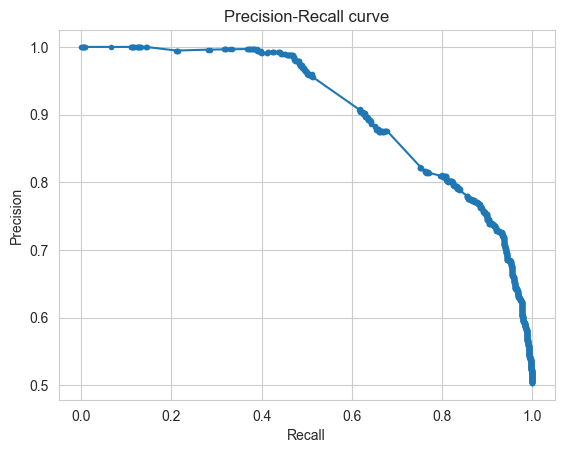

In [188]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Compute precision and recall at various thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)

# Plot Precision-Recall curve
import matplotlib.pyplot as plt

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


In [114]:
# Make predictions on validation set
y_pred = model.predict(X_val)

In [115]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print model performance
print("\nModel Performance on Validation Set:")
print("====================================")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Model Performance on Validation Set:

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.78      0.80       863
        True       0.80      0.84      0.82       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [116]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))



Confusion Matrix:
[[675 188]
 [142 734]]


In [117]:
print("\nAccuracy Score:", accuracy_score(y_val, y_pred))



Accuracy Score: 0.8102357676825762


In [189]:
import seaborn as sns
# Feature importance visualization
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# # Plot feature importance
# plt.figure(figsize=(12, 6))
# sns.barplot(x='importance', y='feature', data=feature_importance)
# plt.title('Feature Importance')
# plt.xlabel('Importance Score')
# plt.ylabel('Features')
# plt.tight_layout()
# plt.show()
print(feature_importance)

              feature  importance
6   SpentMoreThanZero    0.765556
7    HomePlanet_Earth    0.054563
14             Deck_E    0.019812
0           CryoSleep    0.019189
8   HomePlanet_Europa    0.017386
16             Deck_G    0.016156
5          TotalSpent    0.011556
4              VRDeck    0.011055
3                 Spa    0.010409
9     HomePlanet_Mars    0.010239
2           FoodCourt    0.009556
15             Deck_F    0.009190
1         RoomService    0.008776
12             Deck_C    0.008751
17             Side_P    0.006430
13             Deck_D    0.005667
11             Deck_B    0.005634
18             Side_S    0.005215
10             Deck_A    0.004860


In [190]:
# Make predictions on test set
test_predictions = model.predict(X_test)

In [191]:
X.head()

,CryoSleep,RoomService,FoodCourt,Spa,VRDeck,TotalSpent,SpentMoreThanZero,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Side_P,Side_S
0,-0.73277,-0.333105,-0.281027,-0.270626,-0.263003,-0.514066,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.73277,-0.168073,-0.275387,0.217158,-0.224205,-0.251479,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.73277,-0.268001,1.959998,5.695623,-0.219796,3.190333,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.73277,-0.333105,0.523010,2.687176,-0.092818,1.332604,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.73277,0.125652,-0.237159,0.231374,-0.261240,-0.124824,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [192]:
# Create submission file with correct format
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Transported': test_predictions.astype(bool)  # Convert to boolean as per submission format
})

In [193]:
# Save processed training data with target
df_train_processed_with_target = X.copy()
df_train_processed_with_target['Transported'] = y


In [194]:
df_train_processed_with_target.to_csv(f'data-out/train-processed-{current_date}.csv', index=False)

In [195]:
#df_train_processed_with_target.to_csv(f'data-out/train-processed-{current_date}.csv', index=False)

# Save processed test data
X_test.to_csv(f'data-out/test-processed-{current_date}.csv', index=False)


In [196]:
# Save submission file
submission.to_csv(f'data-out/predictions-{current_date}.csv', index=False)
print(f"Saved submission to: data-out/predictions-{current_date}.csv")


Saved submission to: data-out/predictions-2024-12-27.csv


In [197]:
# Print submission format verification
print("\nSubmission Format Verification:")
print("Shape:", submission.shape)
print("\nFirst few rows:")
print(submission.head())
print("\nValue counts for Transported:")
print(submission['Transported'].value_counts(normalize=True))

# Print feature importance summary
print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Optional: Save feature importance
feature_importance.to_csv(f'data-out/feature_importance-{current_date}.csv', index=False)



Submission Format Verification:
Shape: (4277, 2)

First few rows:
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False

Value counts for Transported:
Transported
True     0.527005
False    0.472995
Name: proportion, dtype: float64

Top 10 most important features:
              feature  importance
6   SpentMoreThanZero    0.765556
7    HomePlanet_Earth    0.054563
14             Deck_E    0.019812
0           CryoSleep    0.019189
8   HomePlanet_Europa    0.017386
16             Deck_G    0.016156
5          TotalSpent    0.011556
4              VRDeck    0.011055
3                 Spa    0.010409
9     HomePlanet_Mars    0.010239


In [198]:
# Optional: Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))


Top 10 most important features:
              feature  importance
6   SpentMoreThanZero    0.765556
7    HomePlanet_Earth    0.054563
14             Deck_E    0.019812
0           CryoSleep    0.019189
8   HomePlanet_Europa    0.017386
16             Deck_G    0.016156
5          TotalSpent    0.011556
4              VRDeck    0.011055
3                 Spa    0.010409
9     HomePlanet_Mars    0.010239
